In [1]:
# Connect to Database
import os

database_url = os.environ["database_url"]
verbose = False

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

session = sessionmaker(bind=create_engine(database_url, echo=False), autoflush=False)()

In [2]:
# Select Daten aus dem Statistik Job

import json
from sqlalchemy import func
from kolonne.database.models import Job, JobHistorie

_, historie, zeitpunkt = session.query(Job, JobHistorie, func.max(JobHistorie.zeitpunkt)).join(JobHistorie).filter(Job.name == 'statistik').first()

data_historie = list(filter(lambda r: r and not r.startswith("#") and not r.startswith("*"), historie.ergebnis_text.split("\n")))[0]

data_historie = json.loads(data_historie)

if verbose:
    print(data_historie)


In [3]:
# Filter Status In Arbeit

status_str = "In Arbeit"
status = "I"

data_status_count = data_historie["status_count"]

if verbose:
    print(data_status_count)

data = [d for d in data_status_count if d["status"] == status]

if verbose:
    print(data)

In [4]:
# Filter Spalten in neue CSV Liste

columns = ["Kostenstelle", "Anzahl"]

data_csv = [(d['kolonne__bezeichnung'],d['status__count']) for d in data]

if verbose:
    print(data_csv)

In [5]:
# DataFrame erstellen

import pandas as pd

data_frame = pd.DataFrame.from_records(data_csv, columns=columns)

if verbose:
    print(data_frame)

Text(0.5, 1.0, "Anzahl Aufmaße im Status 'In Arbeit', Zeitpunkt: 2021-11-04 18:03:47.784304")

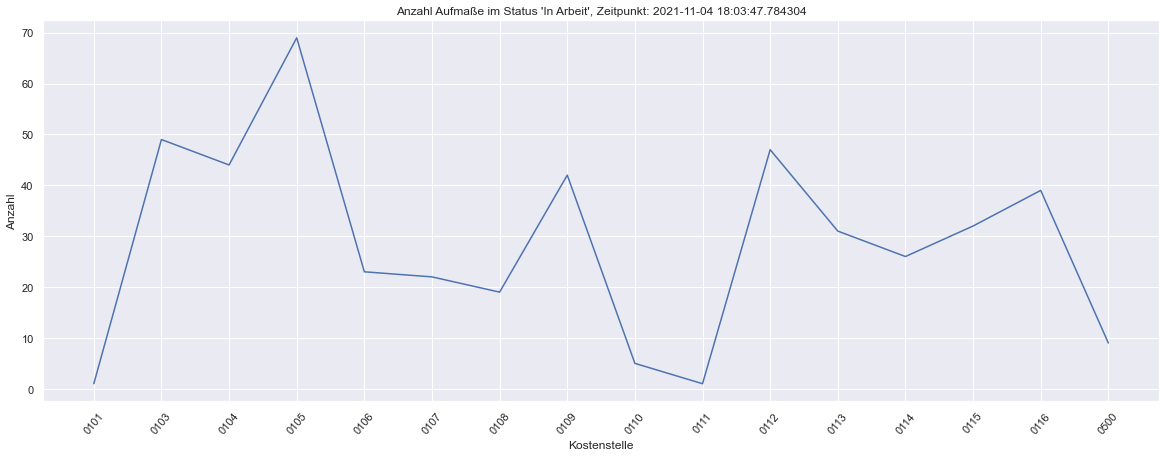

In [6]:
# Diagramm erstellen

import matplotlib.pyplot as plt
import seaborn as sn

sn.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(20,7))

labels = data_frame.loc[:,'Kostenstelle'].values
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=50)

plot = sn.lineplot(x="Kostenstelle", y="Anzahl", data=data_frame, ax=ax)
plot.set_title(f"Anzahl Aufmaße im Status '{status_str}', Zeitpunkt: {zeitpunkt}")

# Kontextmenü "Create New View for Output" um das Bild zu speichern
